# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.

Dataset: The chosen dataset for this assignment is: https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset.

In [3]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
algerian_ff = fetch_ucirepo(id=547) 
X = algerian_ff.data.features 
y = algerian_ff.data.targets 
print(algerian_ff.variables) 

           name     role         type demographic               description  \
0        region  Feature  Categorical        None  Bejaia or Sidi-Bel Abbes   
1           day  Feature      Integer        None                      None   
2         month  Feature      Integer        None                      None   
3          year  Feature      Integer        None                      None   
4   Temperature  Feature      Integer        None          temperature noon   
5            RH  Feature      Integer        None         relative humidity   
6            Ws  Feature      Integer        None                wind speed   
7         Rain   Feature   Continuous        None                      None   
8          FFMC  Feature   Continuous        None   Fine Fuel Moisture Code   
9           DMC  Feature   Continuous        None        Duff Moisture Code   
10           DC  Feature   Continuous        None              Drought Code   
11          ISI  Feature   Continuous        None   

In [5]:
if isinstance(algerian_ff.data.targets, pd.DataFrame):
    y = algerian_ff.data.targets.squeeze()
else:
    y = pd.Series(algerian_ff.data.targets, name='target')

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

# Impute missing values for numeric columns
imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = pd.DataFrame(imputer.fit_transform(X[numeric_cols]), columns=numeric_cols)

# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Combine the imputed numeric data and encoded categorical data
X_processed = pd.concat([X_numeric_imputed, X_categorical_encoded], axis=1)

# Check for any remaining NaNs and handle them
print("Any NaNs in X_processed before handling:", X_processed.isna().sum().sum())

# Remove rows with NaNs
X_processed = X_processed.dropna()
print("Any NaNs in X_processed after handling:", X_processed.isna().sum().sum())

# Align y with the processed X
y_aligned = y.loc[X_processed.index]

# Check for NaNs in y_aligned
print("Any NaNs in y_aligned before handling:", y_aligned.isna().sum())

# Remove rows with NaNs in y_aligned
y_aligned = y_aligned.dropna()
print("Any NaNs in y_aligned after handling:", y_aligned.isna().sum())

# Ensure indices match
X_processed = X_processed.loc[y_aligned.index]

print("X_processed shape:", X_processed.shape)
print("y_aligned shape:", y_aligned.shape)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_aligned, test_size=0.2, random_state=42)

Any NaNs in X_processed before handling: 0
Any NaNs in X_processed after handling: 0
Any NaNs in y_aligned before handling: 1
Any NaNs in y_aligned after handling: 0
X_processed shape: (243, 337)
y_aligned shape: (243,)


In [6]:
clf = DecisionTreeClassifier(random_state=69)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [7]:
print("Features Head:")
print(X.head())  
print("Targets Head:")
print(y.head()) 

Features Head:
   region  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  \
0  Bejaia    1      6  2012           29   57   18    0.0  65.7  3.4   7.6   
1  Bejaia    2      6  2012           29   61   13    1.3  64.4  4.1   7.6   
2  Bejaia    3      6  2012           26   82   22   13.1  47.1  2.5   7.1   
3  Bejaia    4      6  2012           25   89   13    2.5  28.6  1.3   6.9   
4  Bejaia    5      6  2012           27   77   16    0.0  64.8  3.0  14.2   

   ISI  BUI  FWI  
0  1.3  3.4  0.5  
1  1.0  3.9  0.4  
2  0.3  2.7  0.1  
3  0.0  1.7    0  
4  1.2  3.9  0.5  
Targets Head:
0    not fire   
1    not fire   
2    not fire   
3    not fire   
4    not fire   
Name: Classes  , dtype: object


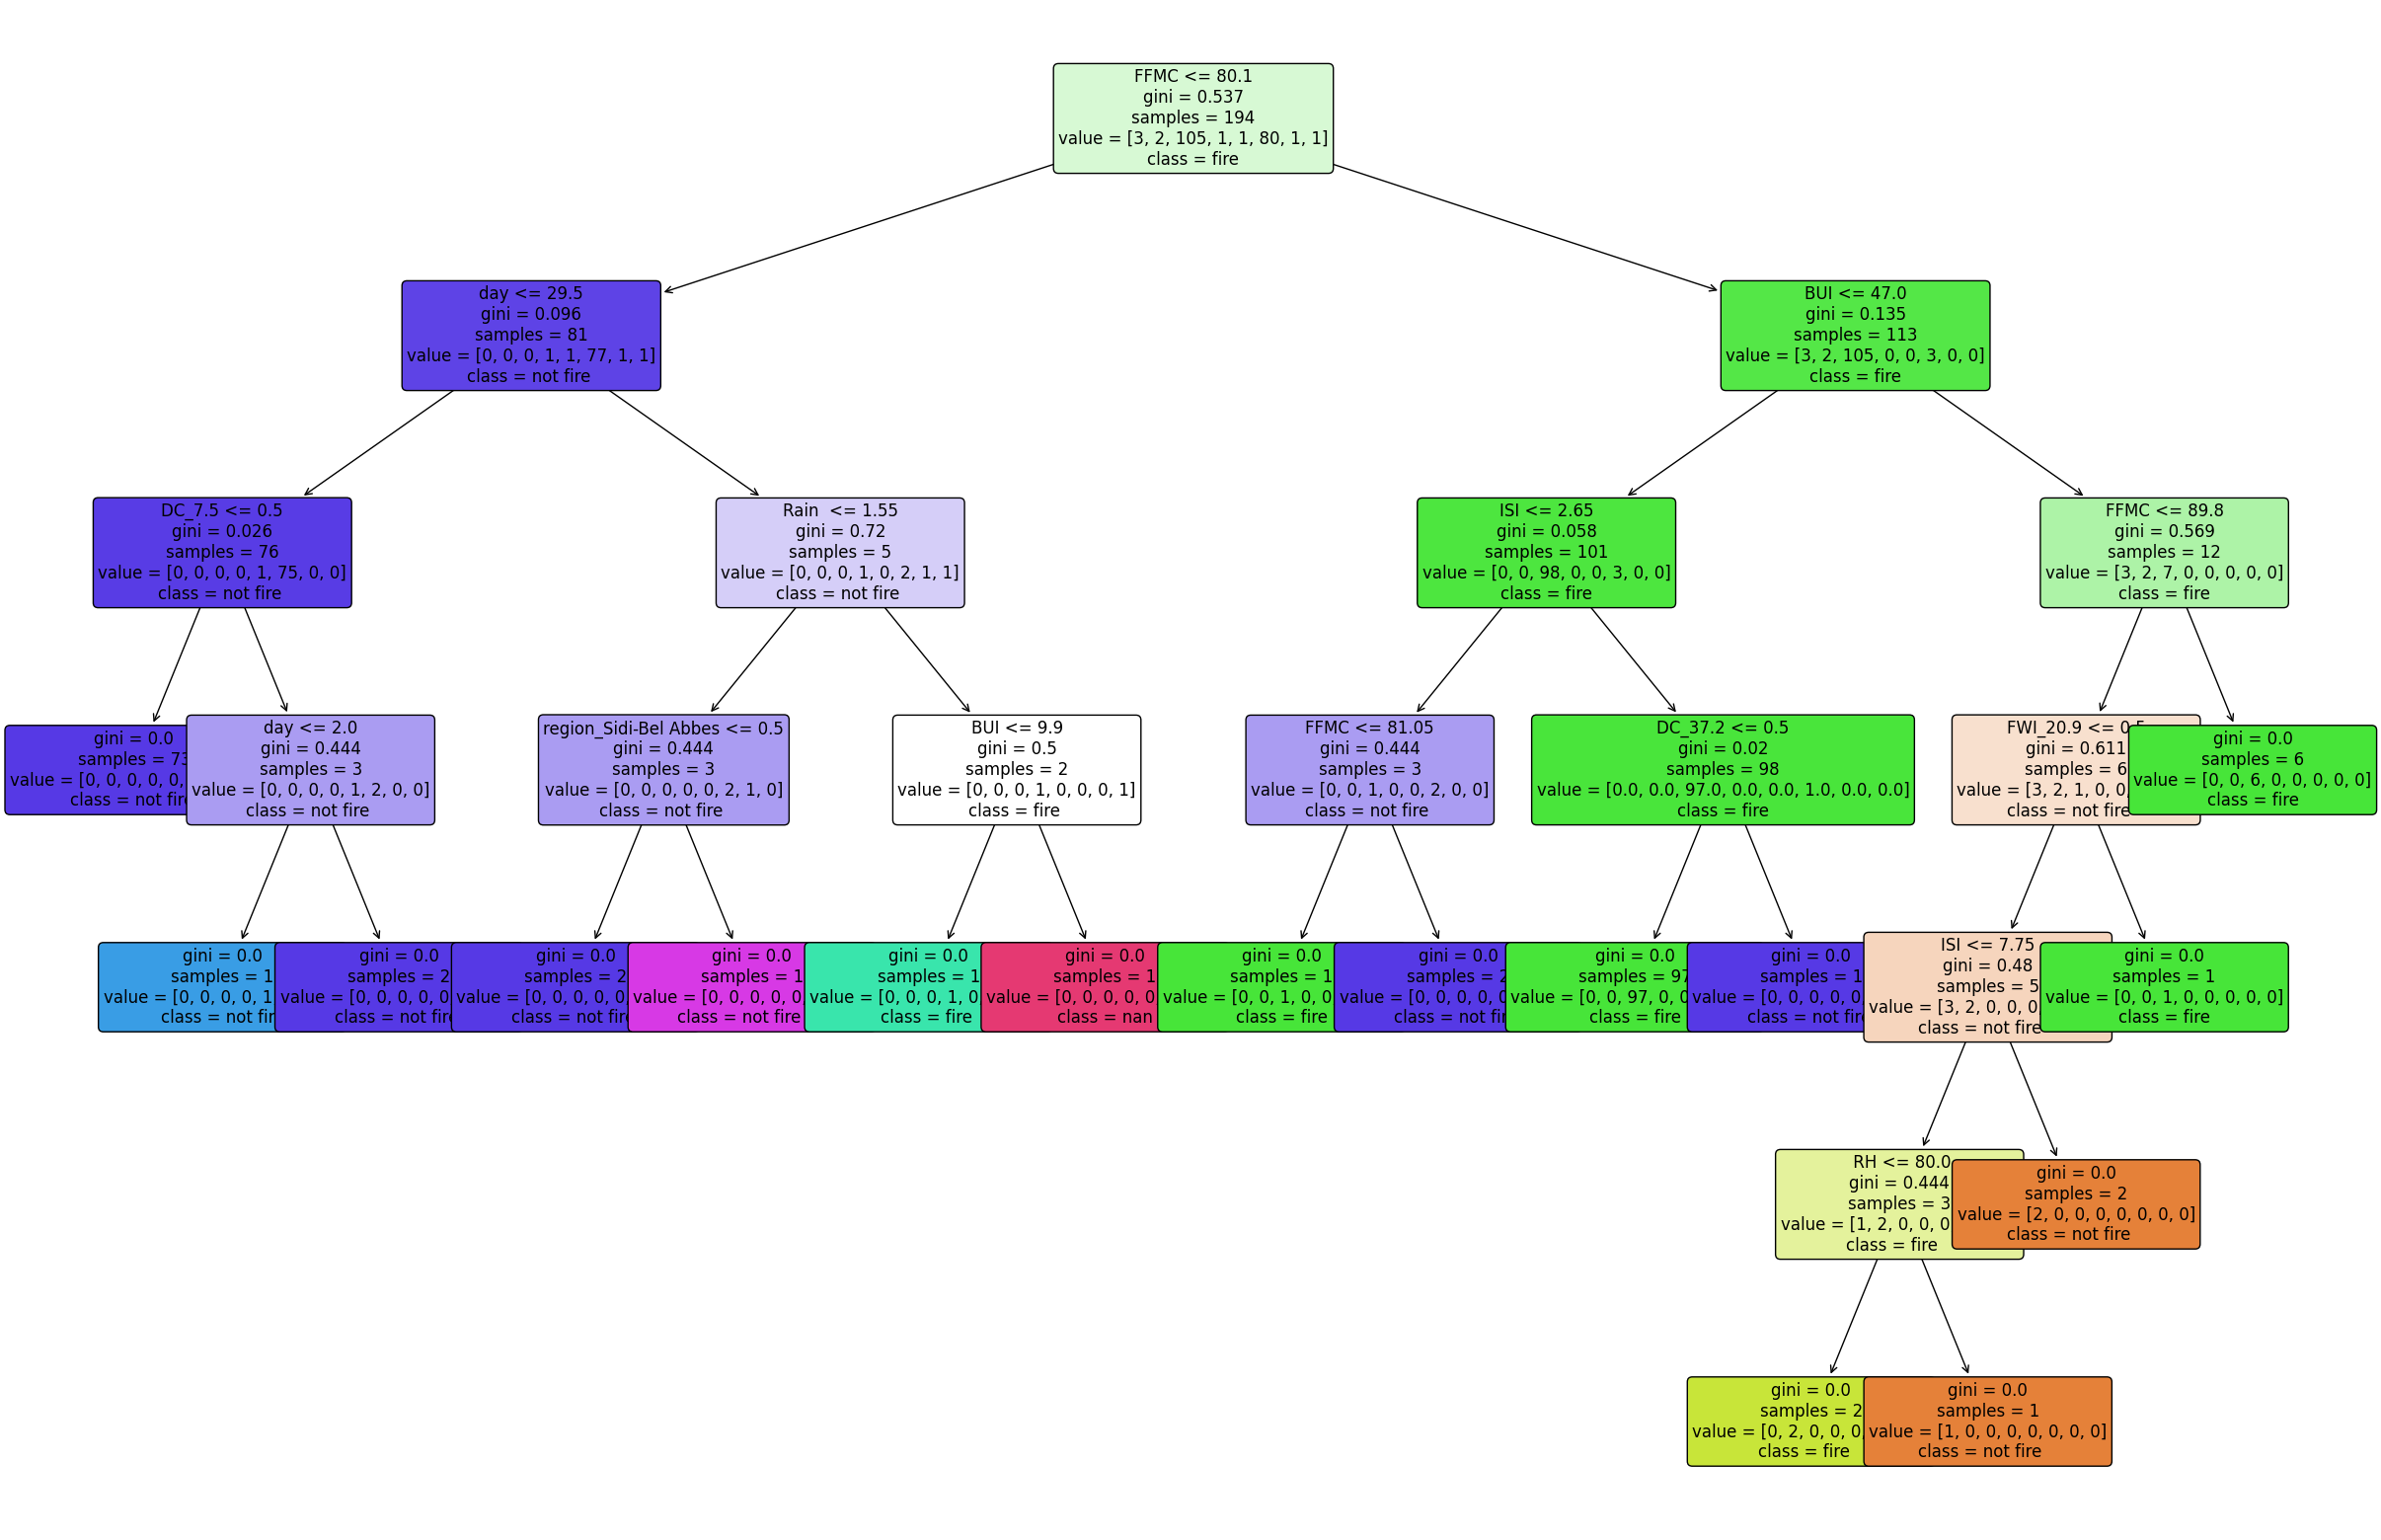

In [8]:
unique_classes = y.unique().astype(str).tolist()
plt.figure(figsize=(30, 20)) 
plot_tree(clf, feature_names=X_processed.columns, class_names=unique_classes, filled=True, rounded=True, fontsize=12)
plt.show()

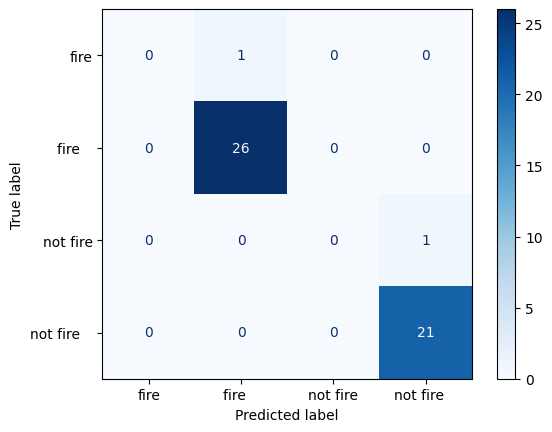

Confusion Matrix:
[[ 0  1  0  0]
 [ 0 26  0  0]
 [ 0  0  0  1]
 [ 0  0  0 21]]
True Positives: 0
False Positives: 1
False Negatives: 0
True Negatives: 26


In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()
print("Confusion Matrix:")
print(cm)

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]
print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")

In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Classification Report:
              precision    recall  f1-score   support

        fire       1.00      0.00      0.00         1
     fire          0.96      1.00      0.98        26
    not fire       1.00      0.00      0.00         1
 not fire          0.95      1.00      0.98        21

    accuracy                           0.96        49
   macro avg       0.98      0.50      0.49        49
weighted avg       0.96      0.96      0.94        49

